In [1]:
pip install pyproj

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 42.1 MB/s eta 0:00:00


In [2]:
import pandas as pd

In [3]:
ruta = 'https://raw.githubusercontent.com/fmoreno4/datasets/main/eventos_dengue_2020.csv'
df = pd.read_csv(ruta)
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,hipotension,hepatomegalia,hemorragia_mucosa,hipotermia,caida_plaquetas,acum_liquido,aum_hematocrito,conducta,latitud,longitud
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.076011,-73.102501
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.079495,-73.105400
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.090290,-73.091003
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.067435,-73.090958
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2,2,2,1,2,2,2. Hospitalizacion piso,7.066905,-73.104980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,2,1,2,2,2,2,1. Ambulatorio,7.072610,-73.099487
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,2,2,2,2,1,2,1,2. Hospitalizacion piso,7.065252,-73.103607
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.091391,-73.103264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,2,2,2,2,2,2,1. Ambulatorio,7.061083,-73.097000


In [4]:
df.dtypes

ID                     int64
fec_not               object
semana                 int64
año                    int64
edad_                  int64
uni_med_               int64
sexo_                 object
cod_pais_o             int64
cod_dpto_o             int64
cod_mun_o              int64
area_                  int64
ocupacion_             int64
tip_ss_               object
cod_ase_              object
gp_discapa             int64
gp_desplaz             int64
gp_migrant             int64
gp_carcela             int64
gp_gestan              int64
gp_calle               int64
gp_psiquia             int64
gp_vic_vio             int64
fecha_contagio        object
inicio_sintomas       object
pac_hos_               int64
fec_hos_              object
condicion_final        int64
fecha_defuncion      float64
fecha_nacimiento      object
certif_defuncion     float64
familiar_sintomas      int64
fiebre                 int64
cefalea                int64
dolor_retroocular      int64
mialgias      

In [5]:
#Se formatean los datos de fecha
from datetime import datetime

df['fec_not2'] = pd.to_datetime(df['fec_not'], format="%d/%m/%Y")
df['fecha_contagio2'] = pd.to_datetime(df['fecha_contagio'], format="%d/%m/%Y")
df['inicio_sintomas2'] = pd.to_datetime(df['inicio_sintomas'], format="%d/%m/%Y")
df['fec_hos_2'] = pd.to_datetime(df['fec_hos_'], format="%d/%m/%Y")

In [6]:
#Creación de la proyección
import pyproj

P = pyproj.Proj(proj='utm', zone=18, ellps='WGS84', preserve_units=True)

In [7]:
#Se convertirán las coordenadas geográficas a UTM
df['x'], df['y'] = P(df['longitud'], df['latitud'])
df

,ID,fec_not,semana,año,edad_,uni_med_,sexo_,cod_pais_o,cod_dpto_o,cod_mun_o,...,aum_hematocrito,conducta,latitud,longitud,fec_not2,fecha_contagio2,inicio_sintomas2,fec_hos_2,x,y
0,1,17/01/2020,1,2020,25,1,F,170,68,276,...,2,1. Ambulatorio,7.076011,-73.102501,2020-01-17,2020-01-17,2020-01-10,NaT,709584.027559,782579.281866
1,2,10/01/2020,1,2020,24,1,M,170,68,276,...,2,1. Ambulatorio,7.079495,-73.105400,2020-01-10,2020-01-10,2020-01-07,NaT,709262.121378,782963.354103
2,3,12/01/2020,1,2020,58,1,M,170,68,276,...,2,1. Ambulatorio,7.090290,-73.091003,2020-01-12,2020-01-12,2020-01-08,NaT,710847.924654,784163.825097
3,4,12/01/2020,1,2020,29,1,F,170,68,276,...,2,1. Ambulatorio,7.067435,-73.090958,2020-01-12,2020-01-10,2020-01-06,NaT,710863.366771,781635.895608
4,5,10/01/2020,1,2020,56,1,F,170,68,276,...,2,2. Hospitalizacion piso,7.066905,-73.104980,2020-01-10,2020-01-10,2020-01-07,2020-01-10,709314.159319,781570.969374
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1257,1258,7/03/2020,9,2020,36,1,F,170,68,276,...,2,1. Ambulatorio,7.072610,-73.099487,2020-03-07,2020-03-06,2020-03-03,NaT,709918.546763,782204.438977
1258,1259,13/03/2020,9,2020,42,1,M,170,68,276,...,1,2. Hospitalizacion piso,7.065252,-73.103607,2020-03-13,2020-03-13,2020-03-06,2020-03-13,709466.644754,781388.734012
1259,1260,8/03/2020,9,2020,2,1,M,170,68,276,...,2,1. Ambulatorio,7.091391,-73.103264,2020-03-08,2020-03-08,2020-03-04,NaT,709492.782783,784279.996264
1260,1261,11/03/2020,9,2020,12,1,F,170,68,276,...,2,1. Ambulatorio,7.061083,-73.097000,2020-03-11,2020-03-11,2020-03-05,NaT,710198.574916,780930.648555


In [8]:
import numpy as np


In [9]:
lat_min, lat_max = df['x'].min(), df['x'].max()
lon_min, lon_max = df['y'].min(), df['y'].max()

resolution = 10

num_rows = int((lat_max - lat_min) / resolution) + 1
num_cols = int((lon_max - lon_min) / resolution) + 1

print("Número de filas:", num_rows)
print("Número de columnas:", num_cols)



Número de filas: 438
Número de columnas: 455


In [10]:
grid = [[[] for j in range(num_cols)] for i in range(num_rows)]

for i, row in df.iterrows():
    x, y = row['x'], row['y']
    row_idx = int((x - lat_min) / resolution)
    col_idx = int((y - lon_min) / resolution)
    grid[row_idx][col_idx].append((x, y))
grid_count = np.zeros((num_rows, num_cols))

for i in range(num_rows):
    for j in range(num_cols):
        grid_count[i][j] = len(grid[i][j])

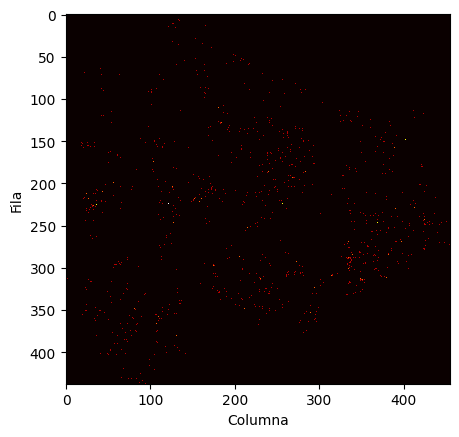

In [11]:
import numpy as np
import matplotlib.pyplot as plt

# Crear el gráfico
plt.imshow(grid_count, cmap='hot', interpolation='nearest')

# Personalizar el gráfico
plt.xlabel('Columna')
plt.ylabel('Fila')

# Mostrar el gráfico
plt.show()

In [12]:
def kernel_epanechnikov(x):
    x = np.abs(x)
    return np.where(x <= 200, (3/4) * (1 - (x/200)**2), 0)

In [13]:
def kernel_uniform(x):
    if abs(x) <= 1:
        return 0.5
    else:
        return 0


In [14]:
def kernel_triangular(x):
    if abs(x) <= 1:
        return 1 - abs(x)
    else:
        return 0


In [15]:

def kernel_laplace(x):
    return (1/2) * np.exp(-abs(x))



In [16]:
import numpy as np
from scipy.spatial.distance import cdist

# Definir la función de kernel Epanechnikov
def epanechnikov_kernel(distance, bandwidth):
    normalized_distance = distance / bandwidth
    kernel_values = np.zeros_like(normalized_distance)
    mask = normalized_distance <= 1
    kernel_values[mask] = 0.75 * (1 - normalized_distance[mask]**2)
    return kernel_values

# Crear la matriz de densidades
density_grid = np.zeros((num_rows, num_cols))

for i in range(num_rows):
    for j in range(num_cols):
        num_points = len(grid[i][j])  # Número de puntos en la celda
        if num_points > 0:
            distances = cdist([(i, j)], [(i, j)])[0]  # Distancia a sí misma (0)
            kernel_values = epanechnikov_kernel(distances, 200)  # Ancho de banda de 200 metros
            density = np.sum(kernel_values) / num_points
            density_grid[i][j] = density


<ipython-input-17-751234538fd9>:1: DeprecationWarning: Please use `gaussian_filter` from the `scipy.ndimage` namespace, the `scipy.ndimage.filters` namespace is deprecated.
  from scipy.ndimage.filters import gaussian_filter


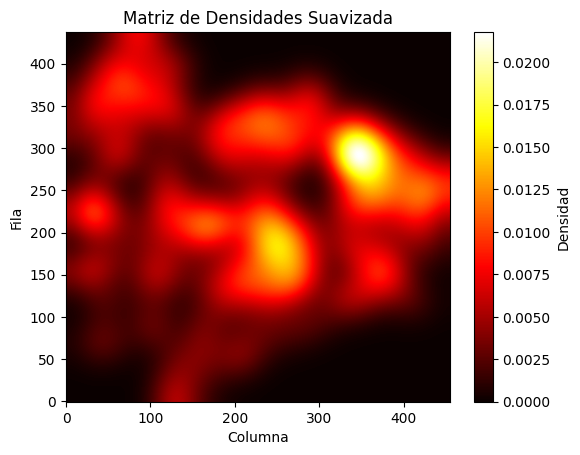

In [17]:
from scipy.ndimage.filters import gaussian_filter

# Definir la desviación estándar del kernel gaussiano
sigma = 20

# Suavizar la matriz de densidad con una convolución gaussiana
density_smooth = gaussian_filter(density_grid, sigma=sigma)

# Graficar la matriz de densidades suavizada
plt.imshow(density_smooth, cmap='hot', origin='lower')
plt.colorbar(label='Densidad')
plt.xlabel('Columna')
plt.ylabel('Fila')
plt.title('Matriz de Densidades Suavizada')
plt.show()